**Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import simplejson
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List, Dict, Tuple
from sklearn.linear_model import LinearRegression

**Code**

Q1 = 13.0
Q3 = 19.0
IQR = 6.0
Lower Bound = 4.0
Upper Bound = 28.0

القيم الشاذة:
   income
6     100


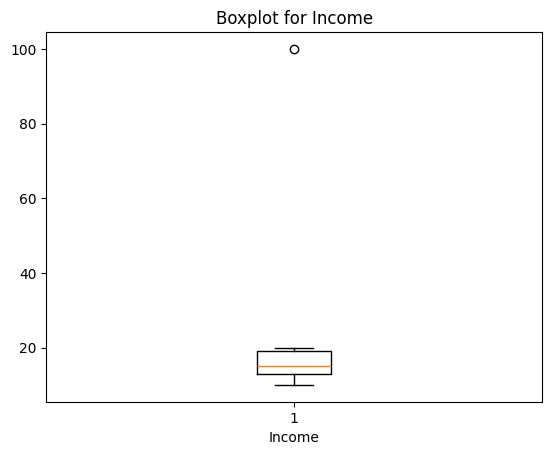

In [5]:
# =========================
# 1️⃣ استيراد المكتبات
# =========================
# import pandas as pd
# import matplotlib.pyplot as plt

# =========================
# 2️⃣ إنشاء بيانات تجريبية
# =========================
# نفترض أن هذا عمود دخل (income)
data = {
    "income": [10, 12, 14, 15, 18, 20, 100]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# =========================
# 3️⃣ حساب Q1 و Q3
# =========================
# Q1: الربع الأول (25%)
# Q3: الربع الثالث (75%)
Q1 = df["income"].quantile(0.25)
Q3 = df["income"].quantile(0.75)

# =========================
# 4️⃣ حساب IQR
# =========================
IQR = Q3 - Q1

# =========================
# 5️⃣ حساب الحدود (Lower & Upper)
# =========================
k = 1.5  # معامل Tukey الشائع

lower_bound =  Q1 - k * IQR
upper_bound = Q3 + k * IQR

# =========================
# 6️⃣ طباعة القيم للحساب
# =========================
print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

# =========================
# 7️⃣ تحديد القيم الشاذة
# =========================
# True = قيمة شاذة
outliers_mask = ( df["income"] < lower_bound) | (df["income"] > upper_bound)

# عرض القيم الشاذة فقط
outliers = df[outliers_mask]
print("\nالقيم الشاذة:")
print(outliers)

# =========================
# 8️⃣ رسم Boxplot
# =========================
plt.boxplot(df["income"])
plt.title("Boxplot for Income")
plt.xlabel("Income")
plt.show()

In [6]:
# =========================
# 1️⃣ استيراد المكتبات
# =========================
# import pandas as pd

# =========================
# 2️⃣ إنشاء بيانات تجريبية
# =========================
# نفترض أن هذه بيانات دخل (income)
data = {
    "income": [10, 12, 14, 15, 18, 20, 100]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)

# =========================
# 3️⃣ تحويل العمود إلى float
# =========================
# (أحيانًا يكون العمود نصي، فنحوّله لأرقام)
income = df["income"].astype(float)

# =========================
# 4️⃣ حساب المتوسط والانحراف المعياري
# =========================
mean = income.mean()        # المتوسط الحسابي
std = income.std(ddof=0)    # الانحراف المعياري (Population)

print("Mean =", mean)
print("Std =", std)

# =========================
# 5️⃣ حساب Z-Score لكل قيمة
# =========================
# القانون: z = (x - mean) / std
df["z_score"] = (income - mean) / std

print("\nZ-scores:")
print(df)

# =========================
# 6️⃣ تحديد القيم الشاذة
# =========================
# القاعدة الشائعة: |z| > 3
mask_z = df["z_score"].abs() > 2

# =========================
# 7️⃣ عرض القيم الشاذة فقط
# =========================
outliers = df[mask_z]

print("\nZ-score outliers:")
print(outliers)

Mean = 27.0
Std = 29.966648127543394

Z-scores:
   income   z_score
0      10 -0.567297
1      12 -0.500556
2      14 -0.433816
3      15 -0.400445
4      18 -0.300334
5      20 -0.233593
6     100  2.436042

Z-score outliers:
   income   z_score
6     100  2.436042


info
Q1 = 16010.408831034763
Q3 = 29775.835674211638
IQR = 13765.426843176874
Lower bound = -4637.731433730549
Upper bound = 50423.975938976946
Outliers : 
            income
23    7.258283e+04
25    5.083351e+04
56    7.293704e+04
75    7.564643e+04
80    5.942928e+04
81    5.270192e+04
112   7.328878e+04
123   7.555851e+04
128   5.043085e+04
138   5.943823e+04
184   6.700515e+04
248   5.087046e+04
260   5.701970e+04
284   7.023230e+04
310   8.411626e+04
312   5.466021e+04
338   5.590873e+04
369   6.620314e+04
435   7.255225e+04
488   6.757094e+04
584   8.377103e+04
588   6.216356e+04
607   8.339042e+04
617   5.499918e+04
630   6.187137e+04
639   5.474221e+04
645   5.610577e+04
694   5.431864e+04
696   6.633300e+04
750   6.319744e+04
754   6.460101e+04
773   5.957568e+04
794   6.602564e+04
829   6.353179e+04
886   5.079399e+04
913   5.740153e+04
936   5.206215e+04
985   6.329422e+04
1000  1.000000e+07
1001  2.000000e+07
boxplot


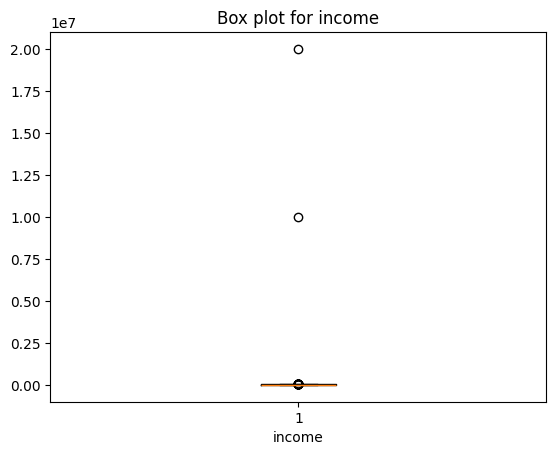

z-score
Mean = 54302.22692065829
Std = 704836.6461951273
Z-scores : 
0       -0.016228
1       -0.032356
2       -0.062612
3       -0.045923
4       -0.034406
          ...    
997     -0.012818
998     -0.051331
999     -0.033954
1000    14.110642
1001    28.298327
Name: z_score, Length: 1002, dtype: float64
Z-score outliers : 
          income    z_score
1000  10000000.0  14.110642
1001  20000000.0  28.298327


In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
np.random.seed(10)
values = np.concatenate([np.random.lognormal(10, 0.5, 1000), [1e7, 2e7]])

df = pd.DataFrame({"income" : values})

# funcs
def detect_outliers_IQR(series, k = 1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers_mask = (df["income"] < lower_bound) | (df["income"] > upper_bound)
    outliers = df[outliers_mask]
    print("info")
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")
    print(f"Lower bound = {lower_bound}")
    print(f"Upper bound = {upper_bound}")
    print(f"Outliers : \n{outliers}")
    print("boxplot")
    plt.boxplot(df["income"])
    plt.title("Box plot for income")
    plt.xlabel("income")
    plt.show()

def detect_outliers_zscore(series, threshold = 2): 
    income = df["income"].astype(float)
    mean = income.mean()
    std = income.std(ddof = 0)
    df["z_score"] = (income - mean) / std
    mask_z = df["z_score"].abs() > 2
    outliers_zscore = df[mask_z]
    print("z-score")
    print(f"Mean = {mean}")
    print(f"Std = {std}")
    print(f"Z-scores : \n{df["z_score"]}")
    print(f"Z-score outliers : \n{outliers_zscore}")

# no
df["income_no"] = df["income"]
# capped
df["income_capped"] = df["income"].clip(lower_bound, upper_bound)
#log1p
df["income_log1p"] = np.log1p(df["income"])